In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [2]:
data = pd.read_csv("Titanic.csv")
data

,Class,Gender,Age,Survived
0,3rd,Male,Child,No
1,3rd,Male,Child,No
2,3rd,Male,Child,No
3,3rd,Male,Child,No
4,3rd,Male,Child,No
...,...,...,...,...
2196,Crew,Female,Adult,Yes
2197,Crew,Female,Adult,Yes
2198,Crew,Female,Adult,Yes
2199,Crew,Female,Adult,Yes


In [3]:
!pip install mlxtend

In [4]:
import pandas as pd
import mlxtend
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt

In [5]:
#print the dataframe
titanic = pd.read_csv("Titanic.csv")
titanic

,Class,Gender,Age,Survived
0,3rd,Male,Child,No
1,3rd,Male,Child,No
2,3rd,Male,Child,No
3,3rd,Male,Child,No
4,3rd,Male,Child,No
...,...,...,...,...
2196,Crew,Female,Adult,Yes
2197,Crew,Female,Adult,Yes
2198,Crew,Female,Adult,Yes
2199,Crew,Female,Adult,Yes


In [6]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2201 entries, 0 to 2200
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Class     2201 non-null   object
 1   Gender    2201 non-null   object
 2   Age       2201 non-null   object
 3   Survived  2201 non-null   object
dtypes: object(4)
memory usage: 68.9+ KB


In [7]:
### Observations 
# All columns are object data type and categorical in nature 
# There arre no values
# As the columns are categorical, We can adopt ane-hot-encoding

<BarContainer object of 4 artists>

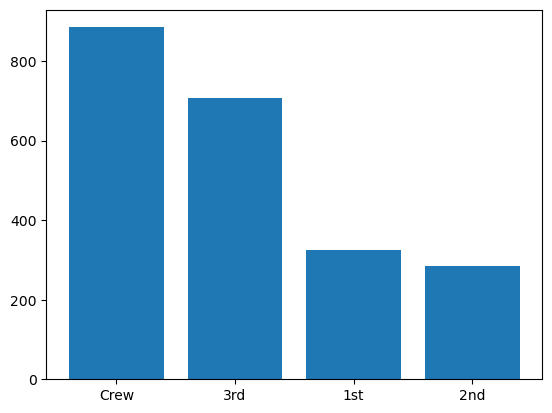

In [8]:
# plot a bar chart to visualize 
counts = titanic['Class'].value_counts()
plt.bar(counts.index, counts.values)

In [9]:
# Perform one-hot encoding on categorical columns
df = pd.get_dummies(titanic,dtype=int)
df.head()

,Class_1st,Class_2nd,Class_3rd,Class_Crew,Gender_Female,Gender_Male,Age_Adult,Age_Child,Survived_No,Survived_Yes
0,0,0,1,0,0,1,0,1,1,0
1,0,0,1,0,0,1,0,1,1,0
2,0,0,1,0,0,1,0,1,1,0
3,0,0,1,0,0,1,0,1,1,0
4,0,0,1,0,0,1,0,1,1,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2201 entries, 0 to 2200
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Class_1st      2201 non-null   int32
 1   Class_2nd      2201 non-null   int32
 2   Class_3rd      2201 non-null   int32
 3   Class_Crew     2201 non-null   int32
 4   Gender_Female  2201 non-null   int32
 5   Gender_Male    2201 non-null   int32
 6   Age_Adult      2201 non-null   int32
 7   Age_Child      2201 non-null   int32
 8   Survived_No    2201 non-null   int32
 9   Survived_Yes   2201 non-null   int32
dtypes: int32(10)
memory usage: 86.1 KB


In [11]:
# Apply Apriori algoritham  to itemset combinations
frequent_itemsets = apriori(df, min_support = 0.05, use_colnames=True, max_len=None)
frequent_itemsets

C:\Users\navee\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.147660,(Class_1st)
1,0.129487,(Class_2nd)
2,0.320763,(Class_3rd)
3,0.402090,(Class_Crew)
4,0.213539,(Gender_Female)
...,...,...
58,0.053612,"(Age_Adult, Gender_Male, Class_1st, Survived_No)"
59,0.069968,"(Age_Adult, Class_2nd, Gender_Male, Survived_No)"
60,0.175829,"(Age_Adult, Class_3rd, Gender_Male, Survived_No)"
61,0.304407,"(Age_Adult, Class_Crew, Gender_Male, Survived_No)"


In [25]:
# Geneate associations rules with metrics
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Gender_Female),(Class_1st),0.213539,0.147660,0.065879,0.308511,2.089329,1.0,0.034348,1.232615,0.662941,0.223077,0.188716,0.377332
1,(Class_1st),(Gender_Female),0.147660,0.213539,0.065879,0.446154,2.089329,1.0,0.034348,1.419998,0.611701,0.223077,0.295774,0.377332
2,(Age_Adult),(Class_1st),0.950477,0.147660,0.144934,0.152486,1.032680,1.0,0.004587,1.005694,0.639010,0.152050,0.005661,0.567012
3,(Class_1st),(Age_Adult),0.147660,0.950477,0.144934,0.981538,1.032680,1.0,0.004587,2.682493,0.037128,0.152050,0.627212,0.567012
4,(Class_1st),(Survived_Yes),0.147660,0.323035,0.092231,0.624615,1.933584,1.0,0.044531,1.803390,0.566471,0.243697,0.445489,0.455064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,"(Gender_Male, Survived_Yes)","(Age_Adult, Class_Crew)",0.166742,0.402090,0.087233,0.523161,1.301104,1.0,0.020188,1.253903,0.277731,0.181132,0.202490,0.370055
160,"(Survived_Yes, Class_Crew)","(Age_Adult, Gender_Male)",0.096320,0.757383,0.087233,0.905660,1.195776,1.0,0.014282,2.571740,0.181174,0.113811,0.611158,0.510419
161,(Age_Adult),"(Gender_Male, Survived_Yes, Class_Crew)",0.950477,0.087233,0.087233,0.091778,1.052103,1.0,0.004320,1.005004,1.000000,0.091778,0.004980,0.545889
162,(Gender_Male),"(Age_Adult, Survived_Yes, Class_Crew)",0.786461,0.096320,0.087233,0.110919,1.151565,1.0,0.011481,1.016420,0.616356,0.109652,0.016155,0.508289


In [27]:
rules.sort_values(by='lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
111,"(Class_1st, Survived_Yes)","(Age_Adult, Gender_Female)",0.092231,0.193094,0.063607,0.689655,3.571602,1.0,0.045798,2.600030,0.793168,0.286885,0.615389,0.509533
106,"(Age_Adult, Gender_Female)","(Class_1st, Survived_Yes)",0.193094,0.092231,0.063607,0.329412,3.571602,1.0,0.045798,1.353691,0.892314,0.286885,0.261279,0.509533
113,(Gender_Female),"(Age_Adult, Class_1st, Survived_Yes)",0.213539,0.089505,0.063607,0.297872,3.328005,1.0,0.044495,1.296766,0.889453,0.265655,0.228851,0.504266
104,"(Age_Adult, Class_1st, Survived_Yes)",(Gender_Female),0.089505,0.213539,0.063607,0.710660,3.328005,1.0,0.044495,2.718119,0.768285,0.265655,0.632098,0.504266
35,(Gender_Female),"(Class_1st, Survived_Yes)",0.213539,0.092231,0.064062,0.300000,3.252709,1.0,0.044367,1.296813,0.880609,0.265038,0.228879,0.497291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24,(Age_Adult),(Survived_No),0.950477,0.676965,0.653339,0.687380,1.015386,1.0,0.009900,1.033317,0.305968,0.670709,0.032243,0.826241
20,(Age_Adult),(Gender_Male),0.950477,0.786461,0.757383,0.796845,1.013204,1.0,0.009870,1.051116,0.263149,0.773191,0.048630,0.879936
21,(Gender_Male),(Age_Adult),0.786461,0.950477,0.757383,0.963027,1.013204,1.0,0.009870,1.339441,0.061028,0.773191,0.253420,0.879936
120,"(Gender_Male, Class_1st)","(Age_Adult, Survived_No)",0.081781,0.653339,0.053612,0.655556,1.003392,1.0,0.000181,1.006434,0.003682,0.078667,0.006393,0.368807


In [ ]:
###
#-Adult Females travelling in 1st class were among the survived most.

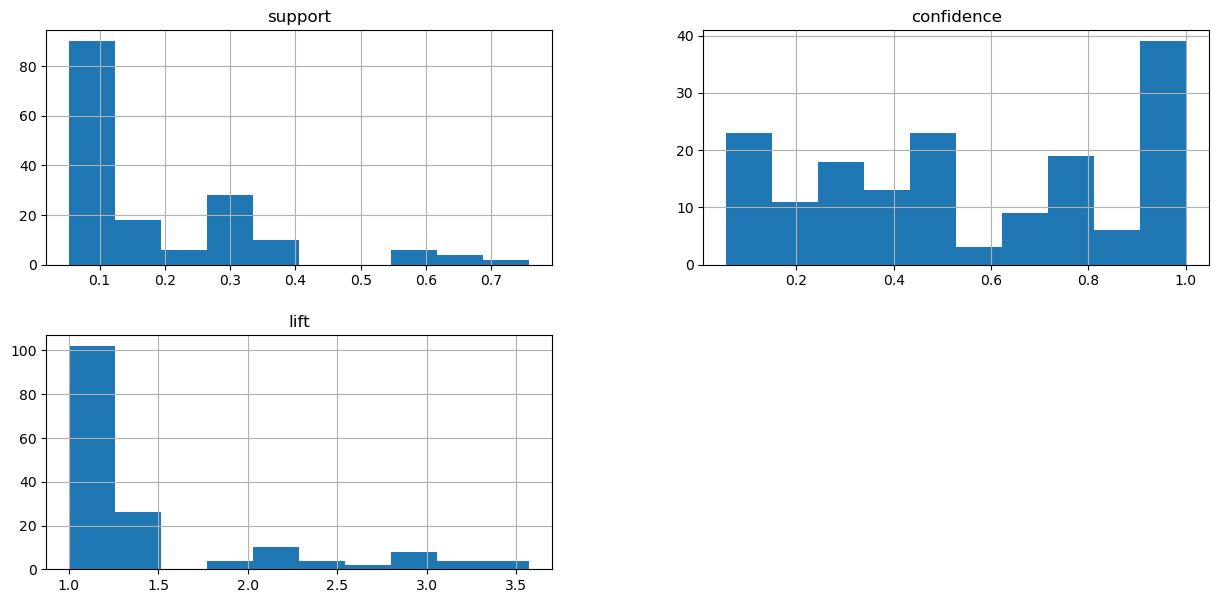

In [38]:
import matplotlib.pyplot as plt
rules[['support','confidence','lift']].hist(figsize=(15,7))
plt.show()

In [ ]:
### Obsetvations
#-THe highest support range is 80+ at 0.5 to 1.5
#-THe highest confidence range is 39+  at 0.9 to 1.0
#-THe highest lift support range is 100+ at 1.0 to 1.5

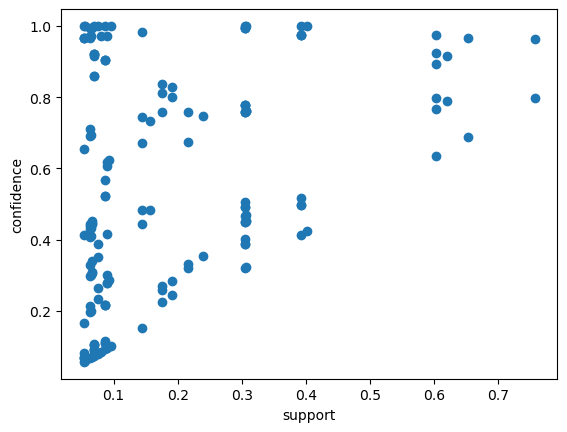

In [46]:
import matplotlib.pyplot as plt
plt.scatter(rules['support'], rules['confidence'])
plt.xlabel("support")
plt.ylabel("confidence")
plt.show()

In [ ]:
### The confidence value is increasing with support for most data points

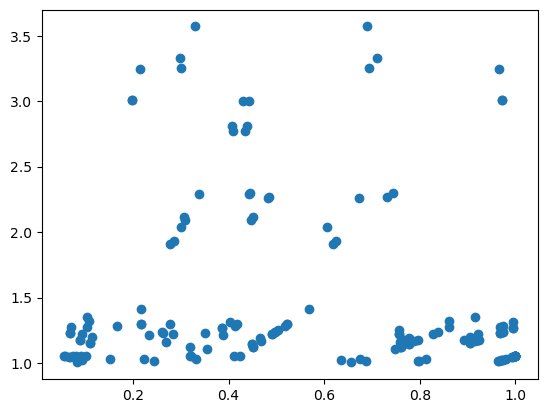

In [50]:
plt.scatter(rules['confidence'],rules['lift'])
plt.show()

In [54]:
rules[rules["consequents"] == ({"Survived_Yes"})]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
4,(Class_1st),(Survived_Yes),0.147660,0.323035,0.092231,0.624615,1.933584,1.0,0.044531,1.803390,0.566471,0.243697,0.445489,0.455064
6,(Class_2nd),(Survived_Yes),0.129487,0.323035,0.053612,0.414035,1.281704,1.0,0.011783,1.155300,0.252481,0.134396,0.134424,0.289999
18,(Gender_Female),(Survived_Yes),0.213539,0.323035,0.156293,0.731915,2.265745,1.0,0.087312,2.525187,0.710327,0.410992,0.603990,0.607870
32,"(Gender_Female, Class_1st)",(Survived_Yes),0.065879,0.323035,0.064062,0.972414,3.010243,1.0,0.042781,24.539982,0.714898,0.197203,0.959250,0.585363
44,"(Age_Adult, Class_1st)",(Survived_Yes),0.144934,0.323035,0.089505,0.617555,1.911727,1.0,0.042686,1.770097,0.557750,0.236495,0.435059,0.447315
92,"(Age_Adult, Gender_Female)",(Survived_Yes),0.193094,0.323035,0.143571,0.743529,2.301699,1.0,0.081195,2.639542,0.700873,0.385366,0.621146,0.593987
102,"(Age_Adult, Gender_Female, Class_1st)",(Survived_Yes),0.065425,0.323035,0.063607,0.972222,3.009650,1.0,0.042473,24.370741,0.714480,0.195804,0.958967,0.584564
